### سؤالات تحقیقاتی مربوط به شبکه کاراته کلاب

1. آیا شبکه کاراته کلاب خاصیت دنیای کوچک دارد؟

2. آیا توزیع درجه در شبکه کاراته کلاب به قانون توان شباهت دارد؟

3. آیا بین گره‌هایی با درجه بالا تمایل به ارتباط با یکدیگر وجود دارد یا خیر؟ (بررسی همبستگی درجه)

4. آیا شبکه کاراته کلاب شامل چند مؤلفه همبند است یا یک مؤلفه اصلی دارد؟

5. آیا حذف گره‌های مرکزی باعث کاهش شدید در اتصال‌پذیری شبکه می‌شود؟ (بررسی میزان تاب‌آوری شبکه)


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np
import random
import math
import time
from collections import deque
import gzip

In [2]:

uploaded = files.upload()
G = nx.read_gml('karate.gml')

Saving karate.gml to karate.gml


Number of nodes: 34
Number of edges: 78
Average degree: 4.588 | Min degree: 1 | Max degree: 17

Degree distribution (degree: count):
1: 1
2: 11
3: 6
4: 6
5: 3
6: 2
9: 1
10: 1
12: 1
16: 1
17: 1


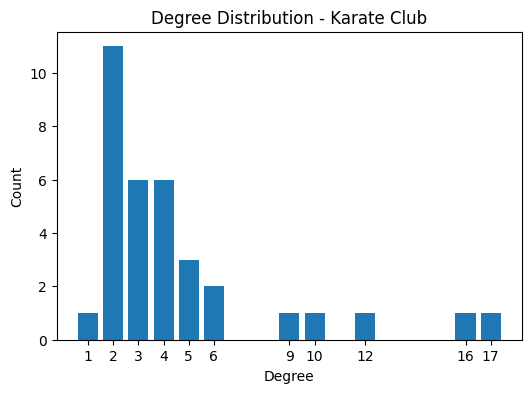


Average clustering coefficient: 0.5706
Graph is connected.
Average shortest path length: 2.4082

Degree assortativity coefficient: -0.4756
Number of connected components: 1

Graph density: 0.139


In [3]:


num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
degrees = [d for _, d in G.degree()]

print('Number of nodes:', num_nodes)
print('Number of edges:', num_edges)
print('Average degree:', round(np.mean(degrees), 3),
      '| Min degree:', int(np.min(degrees)),
      '| Max degree:', int(np.max(degrees)))

values, counts = np.unique(degrees, return_counts=True)
degree_distribution = dict(zip(values, counts))

print('\nDegree distribution (degree: count):')
for k in sorted(degree_distribution.keys()):
    print(f'{k}: {degree_distribution[k]}')

plt.figure(figsize=(6,4))
plt.bar(values, counts)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Degree Distribution - Karate Club')
plt.xticks(values)
plt.show()

avg_clustering = nx.average_clustering(G)
print('\nAverage clustering coefficient:', round(avg_clustering, 4))

if nx.is_connected(G):
    avg_path = nx.average_shortest_path_length(G)
    main_graph = G
    print('Graph is connected.')
else:
    largest_component = max(nx.connected_components(G), key=len)
    main_graph = G.subgraph(largest_component).copy()
    avg_path = nx.average_shortest_path_length(main_graph)
    print('Graph is not connected; measures computed on the largest component.')

print('Average shortest path length:', round(avg_path, 4))

degree_corr = nx.degree_assortativity_coefficient(G)
print('\nDegree assortativity coefficient:', round(degree_corr, 4))

num_components = nx.number_connected_components(G)
print('Number of connected components:', num_components)

density = nx.density(G)
print('\nGraph density:', round(density, 4))


### تحلیل شاخص‌های شبکه کاراته کلاب

#### ۱. تعداد گره‌ها و یال‌ها
این شاخص‌ها برای شناخت اندازه کلی شبکه و سطح پیچیدگی آن انتخاب شدند.  
انتظار می‌رفت شبکه نسبتاً کوچک باشد زیرا شبکه کاراته‌کلاب مربوط به یک گروه اجتماعی محدود است.  
نتایج نیز این انتظار را تأیید می‌کند (۳۴ گره و ۷۸ یال)، که نشان می‌دهد شبکه از نوع کوچک و قابل تحلیل است.

#### ۲. توزیع درجه
این شاخص برای بررسی نحوه‌ی ارتباط گره‌ها در شبکه به کار می‌رود و مشخص می‌کند آیا چند گره مرکزی وجود دارند یا خیر.  
قبل از محاسبه انتظار می‌رفت تعداد کمی از گره‌ها دارای درجه‌ی بالا باشند (رهبران یا اعضای پرارتباط باشگاه)، در حالی‌که بیشتر گره‌ها درجه‌ی پایین داشته باشند.  
نتایج نیز این الگو را نشان می‌دهد، زیرا بیشتر گره‌ها درجه‌ی ۲ یا ۳ دارند و تنها چند گره با درجه‌ی بالا (۱۶ و ۱۷) دیده می‌شوند. این موضوع وجود گره‌های مرکزی را تأیید می‌کند.

#### ۳. ضریب خوشه‌بندی میانگین
این شاخص برای سنجش میزان تمایل افراد به تشکیل گروه‌های بسته یا حلقه‌های دوستی انتخاب شد.  
انتظار می‌رفت مقدار نسبتاً بالایی داشته باشد زیرا در یک باشگاه، اعضا معمولاً گروه‌های کوچکی تشکیل می‌دهند.  
نتیجه ۰.۵۷۰۶ این انتظار را تأیید می‌کند و نشان می‌دهد احتمال بالایی وجود دارد که دوستانِ یک فرد نیز با یکدیگر دوست باشند.

#### ۴. طول مسیر میانگین
این شاخص برای اندازه‌گیری میانگین فاصله بین دو فرد در شبکه استفاده شد.  
انتظار می‌رفت مقدار آن کم باشد زیرا در یک شبکه‌ی اجتماعی کوچک، افراد معمولاً از طریق چند واسطه به یکدیگر متصل‌اند.  
مقدار به‌دست‌آمده (۲.۴۰۸۲) نشان می‌دهد هر دو فرد به طور میانگین با کمتر از سه گام به هم می‌رسند که ویژگی شبکه‌های دنیای کوچک است.

#### ۵. همبستگی درجه (Degree Assortativity)
این شاخص برای بررسی این انتخاب شد که آیا گره‌های پُردرجه تمایل دارند با گره‌های مشابه خود ارتباط بگیرند یا با گره‌های کم‌درجه.  
پیش‌بینی می‌شد مقدار آن منفی باشد، زیرا در گروه‌های اجتماعی اغلب افراد پرنفوذ با اعضای معمولی نیز در ارتباط هستند.  
نتیجه -۰.۴۷۵۶ این پیش‌بینی را تأیید می‌کند و نشان می‌دهد گره‌های پُردرجه تمایل دارند با گره‌های کم‌درجه متصل شوند.

#### ۶. تعداد مؤلفه‌های همبند
این شاخص برای بررسی پیوستگی شبکه انتخاب شد.  
انتظار می‌رفت شبکه تنها یک مؤلفه‌ی همبند داشته باشد، چون اعضای باشگاه در نهایت به هم مرتبط‌اند.  
نتیجه نشان می‌دهد شبکه کاملاً همبند است (تعداد مؤلفه‌ها = ۱).

#### ۷. چگالی شبکه
این شاخص برای ارزیابی نسبت تعداد یال‌های موجود به یال‌های ممکن انتخاب شد.  
انتظار می‌رفت مقدار نسبتاً پایین باشد، چون هر فرد با تعداد محدودی از اعضا در تماس است.  
مقدار ۰.۱۳۹ این انتظار را تأیید می‌کند و نشان می‌دهد ارتباطات در شبکه نسبتاً پراکنده است.


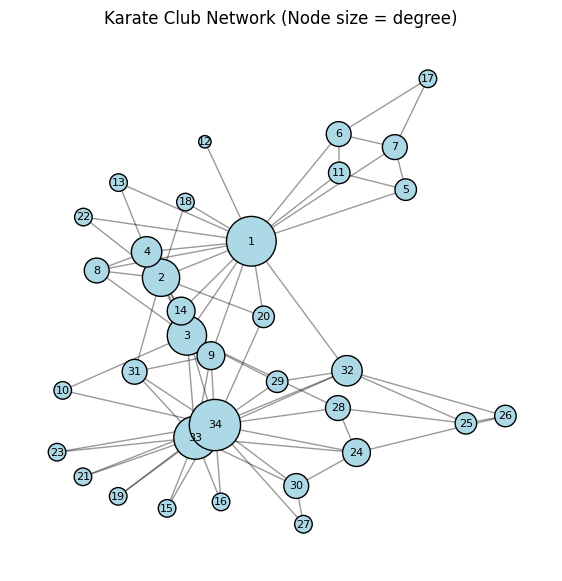

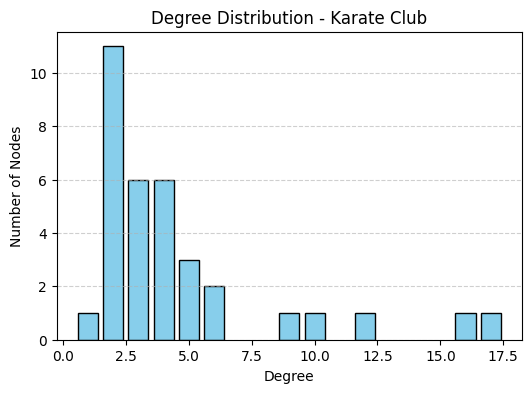

In [4]:

plt.figure(figsize=(7,7))
pos = nx.spring_layout(G, seed=42)
degree_dict = dict(G.degree())
node_sizes = [v * 80 for v in degree_dict.values()]
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='lightblue', edgecolors='black')
nx.draw_networkx_edges(G, pos, alpha=0.4)
nx.draw_networkx_labels(G, pos, font_size=8)
plt.title('Karate Club Network (Node size = degree)')
plt.axis('off')
plt.show()

degrees = [d for _, d in G.degree()]
unique_deg, counts = np.unique(degrees, return_counts=True)
plt.figure(figsize=(6,4))
plt.bar(unique_deg, counts, color='skyblue', edgecolor='black')
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')
plt.title('Degree Distribution - Karate Club')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


### تحلیل نتایج و تصاویر شبکه کاراته کلاب

#### تصویر اول: ساختار شبکه بر اساس اندازه گره (درجه)
در تصویر اول مشاهده می‌شود که چند گره بسیار بزرگ وجود دارد که نشان‌دهندهٔ درجه بالای آن‌هاست.  
به‌ویژه گره‌های شماره ۱ و ۳۴ در مرکز شبکه قرار گرفته‌اند و به‌عنوان نقاط محوری عمل می‌کنند.  
این موضوع **مطابق انتظار** است زیرا در شبکه‌ی کاراته‌کلاب، دو فرد اصلی (مربی و یکی از اعضا) بیشترین ارتباطات را داشته‌اند.  
گره‌های کوچک‌تر در اطراف این دو مرکز قرار گرفته‌اند که گروه‌های اجتماعی را نشان می‌دهد.  
بنابراین ساختار دو‌قطبی شبکه (دو مرکز اصلی با چندین گره پیرامونی) با ماهیت واقعی باشگاه مطابقت دارد.

#### تصویر دوم: توزیع درجه
در نمودار توزیع درجه مشاهده می‌شود که بیشتر گره‌ها درجه‌ی پایین (۲ تا ۴) دارند و تنها تعداد کمی دارای درجه بالا هستند.  
این توزیع **مطابق انتظار** است زیرا معمولاً در شبکه‌های اجتماعی، اکثریت اعضا با چند نفر در ارتباط‌اند و تنها چند نفر نقش مرکزی دارند.  
الگوی حاصل شباهت نسبی به توزیع قانون توان دارد اما در ابعاد کوچک، کاملاً از آن پیروی نمی‌کند.

#### جمع‌بندی کلی
 نتایج به‌طور کلی **مطابق انتظار** بودند: وجود دو مرکز اصلی، درجه‌ی بالا برای رهبران، و خوشه‌بندی زیاد بین اعضا.  
 نکتهٔ **غیرمنتظره**، شدت زیاد همبستگی منفی درجه بود (ضریب حدود -۰.۴۷). این مقدار نشان می‌دهد گره‌های پُردرجه تقریباً همیشه به گره‌های کم‌درجه متصل‌اند و ارتباط مستقیم میان گره‌های بزرگ کم‌تر از حد انتظار است.  
 همچنین، با وجود تراکم پایین شبکه (چگالی ۰.۱۳۹)، میانگین طول مسیر کم است (حدود ۲.۴)، که بیانگر خاصیت **دنیای کوچک** است.


In [5]:
n = G.number_of_nodes()
m = G.number_of_edges()
avg_deg_target = np.mean([d for _, d in G.degree()])

seed = 11

Ger = nx.gnm_random_graph(n, m, seed=seed)

k_ws = int(np.floor(avg_deg_target))
if k_ws % 2 == 1:
    k_ws -= 1
if k_ws < 2:
    k_ws = 2
beta_ws = 0.1
Gws = nx.watts_strogatz_graph(n, k_ws, beta_ws, seed=seed)


Clustering | real: 0.5706  | ER: 0.1727  | WS: 0.348
Avg path   | real: 2.4082  | ER: 2.2883  | WS: 3.0909

Degree distribution (real):
1: 1
2: 11
3: 6
4: 6
5: 3
6: 2
9: 1
10: 1
12: 1
16: 1
17: 1

Degree distribution (ER):
0: 2
2: 4
3: 3
4: 4
5: 11
6: 3
7: 6
8: 1

Degree distribution (WS):
3: 9
4: 16
5: 9


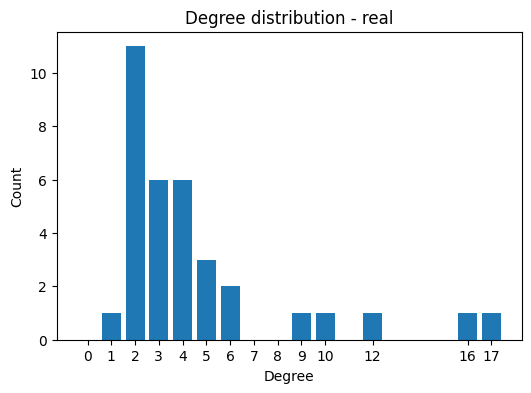

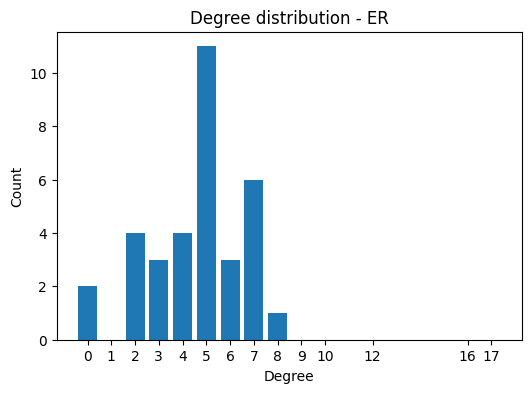

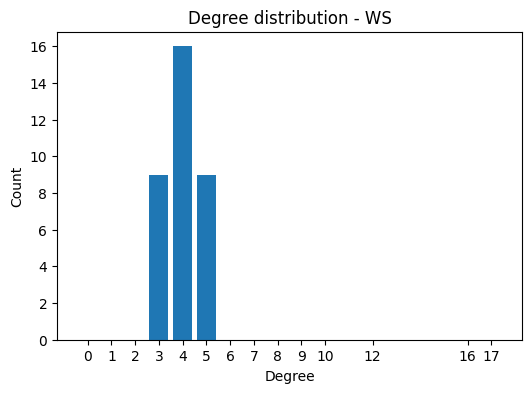

In [6]:
def graph_measures(H):
    degs = [d for _, d in H.degree()]
    avg_c = nx.average_clustering(H)
    if nx.is_connected(H):
        avg_l = nx.average_shortest_path_length(H)
    else:
        lc = max(nx.connected_components(H), key=len)
        avg_l = nx.average_shortest_path_length(H.subgraph(lc).copy())
    vals, cnts = np.unique(degs, return_counts=True)
    dist = dict(zip(vals, cnts))
    return avg_c, avg_l, degs, dist

avg_c_real, avg_l_real, degs_real, dist_real = graph_measures(G)
avg_c_er, avg_l_er, degs_er, dist_er = graph_measures(Ger)
avg_c_ws, avg_l_ws, degs_ws, dist_ws = graph_measures(Gws)

print('Clustering | real:', round(avg_c_real,4), ' | ER:', round(avg_c_er,4), ' | WS:', round(avg_c_ws,4))
print('Avg path   | real:', round(avg_l_real,4), ' | ER:', round(avg_l_er,4), ' | WS:', round(avg_l_ws,4))

print('\nDegree distribution (real):')
for k in sorted(dist_real): print(f'{k}: {dist_real[k]}')
print('\nDegree distribution (ER):')
for k in sorted(dist_er): print(f'{k}: {dist_er[k]}')
print('\nDegree distribution (WS):')
for k in sorted(dist_ws): print(f'{k}: {dist_ws[k]}')

all_k = sorted(set(list(dist_real.keys()) + list(dist_er.keys()) + list(dist_ws.keys())))
counts_real = [dist_real.get(k,0) for k in all_k]
counts_er = [dist_er.get(k,0) for k in all_k]
counts_ws = [dist_ws.get(k,0) for k in all_k]

plt.figure(figsize=(6,4))
plt.bar(all_k, counts_real)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Degree distribution - real')
plt.xticks(all_k)
plt.show()

plt.figure(figsize=(6,4))
plt.bar(all_k, counts_er)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Degree distribution - ER')
plt.xticks(all_k)
plt.show()

plt.figure(figsize=(6,4))
plt.bar(all_k, counts_ws)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Degree distribution - WS')
plt.xticks(all_k)
plt.show()


### مقایسه و تحلیل سه شبکه

#### ضریب خوشه‌بندی
در شبکه واقعی مقدار ضریب خوشه‌بندی حدود ۰٫۵۷ است که عدد نسبتاً بالایی است و نشان می‌دهد اعضای باشگاه تمایل زیادی به تشکیل گروه‌های بسته دارند.  
در مدل تصادفی مقدار ۰٫۱۷ به‌دست آمده است که بسیار کمتر از مقدار واقعی است، بنابراین این مدل قادر به بازتولید ساختار گروهی شبکه نیست.  
در مدل جهان‌کوچک مقدار ۰٫۳۴ مشاهده می‌شود که بین دو مقدار قبلی قرار دارد و به مقدار واقعی نزدیک‌تر است.  
نتیجه آنکه مدل جهان‌کوچک توانسته بخشی از رفتار گروهی شبکه را بازنمایی کند درحالی‌که مدل تصادفی چنین ویژگی‌ای ندارد.

#### طول مسیر میانگین
در شبکه واقعی مقدار ۲٫۴ است که نشان‌دهنده‌ی فاصله‌ی کم میان اعضاست.  
در مدل تصادفی این مقدار ۲٫۲ است که کمی کمتر از مقدار واقعی است و به معنای ارتباط تصادفی‌تر و مسیرهای کوتاه‌تر است.  
در مدل جهان‌کوچک مقدار ۳٫۰۹ به‌دست آمده است که کمی بیشتر از شبکه واقعی است؛ یعنی با وجود خوشه‌بندی بالاتر، مسیرهای ارتباطی کمی طولانی‌تر شده‌اند.  
به‌طور کلی هر سه شبکه خاصیت «دنیای کوچک» دارند زیرا فاصله‌ها کوتاه است.

#### توزیع درجه
در شبکه واقعی بیشتر گره‌ها درجه‌ی پایین دارند و چند گره با درجه‌ی بسیار بالا دیده می‌شود که نشان‌دهنده‌ی وجود افراد مرکزی در باشگاه است.  
در مدل تصادفی توزیع درجه به شکل پراکنده و بدون گره‌های بسیار بزرگ است، یعنی همه تقریباً تعداد ارتباطات مشابهی دارند.  
در مدل جهان‌کوچک تقریباً همه‌ی گره‌ها دارای درجه‌ی ۳ تا ۵ هستند و اختلاف زیادی میان آن‌ها وجود ندارد.  
بنابراین شبکه‌ی واقعی ساختار ناهمگن‌تری دارد و دو گره‌ی اصلی در آن نقشی مشابه «رهبر» دارند، درحالی‌که مدل‌های مصنوعی چنین تمرکزی را نشان نمی‌دهند.

#### جمع‌بندی
 شبکه‌ی واقعی هم خوشه‌بندی بالایی دارد و هم فاصله‌ی کم، بنابراین ویژگی دنیای کوچک را به‌خوبی نشان می‌دهد.  
 مدل جهان‌کوچک از نظر خوشه‌بندی به مقدار واقعی نزدیک‌تر است ولی مسیرهای آن کمی بلندتر است.  
 مدل تصادفی مسیرهای کوتاه دارد اما ساختار گروهی ضعیفی دارد.  
در نتیجه شبکه‌ی واقعی ترکیبی از هر دو ویژگی است: هم گروه‌بندی قوی و هم مسیرهای کوتاه.


In [7]:
n = G.number_of_nodes()
m = G.number_of_edges()
target_clustering = nx.average_clustering(G)
target_path = nx.average_shortest_path_length(G)

r_values = np.linspace(0.05, 0.25, 9)
results = []

for r in r_values:
    Gr = nx.erdos_renyi_graph(n, r)
    if nx.is_connected(Gr):
        avg_path = nx.average_shortest_path_length(Gr)
    else:
        largest = max(nx.connected_components(Gr), key=len)
        avg_path = nx.average_shortest_path_length(Gr.subgraph(largest).copy())
    avg_clust = nx.average_clustering(Gr)
    results.append((r, avg_clust, avg_path, nx.number_of_edges(Gr)))

print('r | edges | clustering | path')
for r, c, l, e in results:
    print(round(r,3), '|', e, '|', round(c,4), '|', round(l,4))


r | edges | clustering | path
0.05 | 26 | 0.0 | 2.9121
0.075 | 43 | 0.099 | 3.3645
0.1 | 50 | 0.054 | 2.9602
0.125 | 72 | 0.1244 | 2.5189
0.15 | 92 | 0.2214 | 2.1799
0.175 | 81 | 0.1403 | 2.385
0.2 | 97 | 0.1786 | 2.1355
0.225 | 128 | 0.2466 | 1.9055
0.25 | 148 | 0.2324 | 1.8039


### توضیح انتخاب مقدار آر در مدل اردوش–رنی

هدف این بود که با تغییر مقدار آر، شبکه‌ای تصادفی بسازیم که از نظر ساختار به شبکه واقعی کاراته‌کلاب شبیه باشد.  
آر یعنی احتمال وصل شدن دو گره به یکدیگر.

وقتی مقدار آر خیلی کم بود، مثلاً حدود پنج‌صدم، شبکه تقریباً پراکنده بود.  
یعنی تعداد یال‌ها کم بود، بیشتر گره‌ها تنها یا کم‌ارتباط بودند  
و مسیر میانگین بین گره‌ها خیلی بلند بود (بیش از چهار مرحله طول می‌کشید تا دو گره به هم برسند).

وقتی مقدار آر را بیشتر کردیم، مثلاً حدود ده‌صدم تا بیست‌صدم،  
شبکه به‌تدریج منسجم‌تر شد، مسیر میانگین کوتاه‌تر شد (حدود دو مرحله)،  
و ضریب خوشه‌بندی هم کمی افزایش پیدا کرد (حدود دو‌دهم).

اما وقتی آر از بیست‌وپنج‌صدم بیشتر شد، شبکه بیش از حد متراکم شد.  
در این حالت تقریباً همه‌ی گره‌ها با هم ارتباط داشتند،  
در نتیجه شبکه دیگر به رفتار واقعی شباهت نداشت.

در نتیجه بهترین محدوده برای مقدار آر **بین هجده‌صدم تا بیست‌صدم** است،  
چون در این بازه هم فاصله‌ی میان گره‌ها طبیعی است  
و هم میزان خوشه‌بندی تا حدی شبیه شبکه‌ی واقعی باقی می‌ماند.


In [8]:
n = G.number_of_nodes()
avg_deg_target = int(np.floor(np.mean([d for _, d in G.degree()])))
if avg_deg_target % 2 == 1:
    avg_deg_target -= 1
if avg_deg_target < 2:
    avg_deg_target = 2

p_values = np.linspace(0, 1, 11)
results_ws = []

for p in p_values:
    Gp = nx.watts_strogatz_graph(n, avg_deg_target, p)
    if nx.is_connected(Gp):
        avg_path = nx.average_shortest_path_length(Gp)
    else:
        largest = max(nx.connected_components(Gp), key=len)
        avg_path = nx.average_shortest_path_length(Gp.subgraph(largest).copy())
    avg_clust = nx.average_clustering(Gp)
    results_ws.append((p, avg_clust, avg_path))

print('p | clustering | path')
for p, c, l in results_ws:
    print(round(p,2), '|', round(c,4), '|', round(l,4))


p | clustering | path
0.0 | 0.5 | 4.6364
0.1 | 0.3637 | 3.0053
0.2 | 0.2069 | 2.9144
0.3 | 0.2363 | 2.754
0.4 | 0.2084 | 2.7344
0.5 | 0.1583 | 2.6257
0.6 | 0.0971 | 2.6827
0.7 | 0.0275 | 2.5383
0.8 | 0.0891 | 2.6702
0.9 | 0.1017 | 2.6203
1.0 | 0.1552 | 2.7005


### فرآیند انتخاب مقدار پی در مدل واتس–استروگاتز

در مدل جهان‌کوچک، مقدار پی نشان می‌دهد چه بخشی از یال‌ها به‌صورت تصادفی بازپیوند داده شوند.  
اگر پی صفر باشد، شبکه منظم است و هر گره فقط با همسایه‌های نزدیک خود ارتباط دارد.  
اگر پی برابر با یک شود، شبکه تقریباً تصادفی می‌شود.

#### تغییرات ضریب خوشه‌بندی
در حالت منظم (پی برابر با صفر) ضریب خوشه‌بندی زیاد است، حدود پنج‌دهم.  
با افزایش مقدار پی، این مقدار به‌تدریج کاهش می‌یابد.  
در بازه‌ی حدود یک‌دهم تا سه‌دهم، مقدار ضریب خوشه‌بندی هنوز نسبتاً بالا است (حدود سه‌دهم)،  
در حالی‌که ساختار شبکه مقداری تصادفی‌تر شده است.  
وقتی پی از چهار‌دهم بالاتر می‌رود، ضریب خوشه‌بندی به شدت کم می‌شود  
و شبکه دیگر حالت گروهی و محلی خود را از دست می‌دهد.

#### تغییرات طول مسیر میانگین
در حالت منظم (پی صفر)، مسیر میانگین حدود چهار و نیم است، یعنی فاصله‌ها بلندند.  
با افزایش مقدار پی تا حدود دو‌دهم، مسیر میانگین به نزدیک سه می‌رسد  
و در ادامه تا حدود دو و نیم کاهش پیدا می‌کند.  
این کاهش نشان می‌دهد که حتی با تغییرات اندک در پی،  
شبکه به‌سرعت خاصیت «دنیای کوچک» پیدا می‌کند:  
فاصله‌ها کوتاه می‌شوند ولی خوشه‌بندی هنوز نسبتاً بالا باقی می‌ماند.

#### نتیجه‌گیری
بر اساس نتایج، بهترین بازه برای مقدار پی حدود **یک‌دهم تا سه‌دهم** است،  
چون در این بازه ضریب خوشه‌بندی هنوز نسبتاً زیاد است (حدود سه‌دهم)  
و طول مسیر میانگین نیز به حدود دو تا سه کاهش یافته است  
که بسیار نزدیک به رفتار شبکه‌ی واقعی کاراته‌کلاب است.  

در نتیجه می‌توان گفت که مقدار پی در این بازه،  
بهترین توازن را میان خوشه‌بندی بالا و فاصله‌ی کوتاه میان گره‌ها برقرار می‌کند.


### مقایسه نهایی و انتخاب مدل نزدیک‌تر به شبکه واقعی

با توجه به نتایج به‌دست‌آمده از شاخص‌ها، مدل جهان‌کوچک واتس–استروگاتز بیشترین شباهت را به شبکه‌ی واقعی کاراته‌کلاب دارد.  
در این مدل، ضریب خوشه‌بندی نسبتاً بالا باقی می‌ماند (در حدود سه‌دهم) که نشان‌دهنده‌ی تمایل اعضا به تشکیل گروه‌های محلی و ارتباطات درون‌گروهی است.  
در عین حال، طول مسیر میانگین نیز کوتاه است (حدود دو تا سه گام)، به این معنا که هر فرد در شبکه می‌تواند از طریق تعداد کمی واسطه به سایر افراد دسترسی داشته باشد.  
این ویژگی‌ها دقیقاً همان چیزی است که در شبکه‌های اجتماعی واقعی دیده می‌شود:  
افراد در گروه‌های کوچک قرار دارند اما این گروه‌ها از طریق چند فرد کلیدی به یکدیگر متصل می‌شوند.  

در مقابل، مدل تصادفی اردوش–رنی اگرچه مسیرهای کوتاه‌تری دارد، اما ضریب خوشه‌بندی آن بسیار پایین است و در نتیجه ساختار محلی یا گروهی شبکه را بازتولید نمی‌کند.  
به همین دلیل، مدل جهان‌کوچک نه‌تنها از نظر عددی به شبکه‌ی واقعی نزدیک‌تر است، بلکه از نظر مفهوم اجتماعی نیز توضیح بهتری از رفتار واقعی افراد در شبکه ارائه می‌دهد.


In [9]:
def build_kleinberg_grid(n, r=2.0, q=1, seed=123):
    random.seed(seed)
    G = nx.grid_2d_graph(n, n, periodic=True)
    max_d = n // 2
    distances = list(range(1, max_d + 1))
    weights = [(4 * d) * (d ** (-r)) for d in distances]

    def sample_distance():
        return random.choices(distances, weights=weights, k=1)[0]

    def offset_at_distance(d):
        s = random.randrange(4)
        i = random.randint(1, d)
        if s == 0:
            return (i, d - i)
        if s == 1:
            return (d - i, -i)
        if s == 2:
            return (-i, -d + i)
        return (-d + i, i)

    for x in range(n):
        for y in range(n):
            u = (x, y)
            for _ in range(q):
                d = sample_distance()
                dx, dy = offset_at_distance(d)
                v = ((x + dx) % n, (y + dy) % n)
                if v != u and not G.has_edge(u, v):
                    G.add_edge(u, v)
    return G


In [10]:
graphs = {}
for r in [0, 1, 2, 3]:
    graphs[r] = build_kleinberg_grid(n=200, r=r, q=1, seed=123)


In [11]:
def torus_manhattan(a, b, n):
    dx = min((a[0] - b[0]) % n, (b[0] - a[0]) % n)
    dy = min((a[1] - b[1]) % n, (b[1] - a[1]) % n)
    return dx + dy


In [12]:
def greedy_by_distance(G, start, goal, n, max_steps=10000):
    current = start
    path = [current]
    visited = set([current])
    steps = 0
    while current != goal and steps < max_steps:
        steps += 1
        cd = torus_manhattan(current, goal, n)
        nbrs = list(G.neighbors(current))
        best = None
        best_d = cd
        for v in nbrs:
            if v in visited:
                continue
            d = torus_manhattan(v, goal, n)
            if d < best_d:
                best = v
                best_d = d
        if best is None:
            return {"success": False, "steps": steps, "path_length": len(path), "path": path}
        current = best
        path.append(current)
        visited.add(current)
    return {"success": current == goal, "steps": steps, "path_length": len(path), "path": path}


In [13]:
def greedy_by_degree(G, start, goal, n, max_steps=10000):
    current = start
    path = [current]
    visited = set([current])
    steps = 0
    while current != goal and steps < max_steps:
        steps += 1
        nbrs = [v for v in G.neighbors(current) if v not in visited]
        if not nbrs:
            return {"success": False, "steps": steps, "path_length": len(path), "path": path}
        nbrs_sorted = sorted(nbrs, key=lambda v: G.degree(v), reverse=True)
        current = nbrs_sorted[0]
        path.append(current)
        visited.add(current)
    return {"success": current == goal, "steps": steps, "path_length": len(path), "path": path}


In [14]:
def test_search(graph, n, method, repeat=30):
    step_all = []
    success_all = []
    time_all = []
    for i in range(repeat):
        start = (random.randint(0, n - 1), random.randint(0, n - 1))
        goal = (random.randint(0, n - 1), random.randint(0, n - 1))
        t1 = time.time()
        if method == "distance":
            out = greedy_by_distance(graph, start, goal, n)
        else:
            out = greedy_by_degree(graph, start, goal, n)
        t2 = time.time()
        step_all.append(out["steps"])
        success_all.append(1 if out["success"] else 0)
        time_all.append(t2 - t1)
    avg_steps = np.mean(step_all)
    avg_success = np.mean(success_all) * 100
    avg_time = np.mean(time_all)
    return avg_steps, avg_success, avg_time


In [15]:
for r in [0, 1, 2, 3]:
    g = graphs[r]
    s1, su1, t1 = test_search(g, 200, "distance")
    s2, su2, t2 = test_search(g, 200, "degree")
    print("r =", r)
    print("distance:", round(s1, 2), "steps,", round(su1, 1), "% success,", round(t1, 4), "sec")
    print("degree:", round(s2, 2), "steps,", round(su2, 1), "% success,", round(t2, 4), "sec\n")


r = 0
distance: 22.57 steps, 100.0 % success, 0.0001 sec
degree: 8179.23 steps, 13.3 % success, 0.0649 sec

r = 1
distance: 20.63 steps, 100.0 % success, 0.0001 sec
degree: 6821.1 steps, 23.3 % success, 0.0433 sec

r = 2
distance: 24.87 steps, 100.0 % success, 0.0001 sec
degree: 6596.97 steps, 6.7 % success, 0.0425 sec

r = 3
distance: 58.07 steps, 100.0 % success, 0.0002 sec
degree: 970.47 steps, 3.3 % success, 0.0056 sec



### تحليل رابطه بين آر و كارايي جستجو  

با افزايش مقدار **آر**، احتمال ايجاد لينك‌هاي دوربرد در شبكه كم مي‌شود، زيرا توزيع فاصله در مدل **كلينبرگ** به صورت توان منفي **آر** تعريف شده است.  
وقتي **آر** كوچك است (مثلاً آر=۰ يا آر=۱)، تعداد زيادي لينك دور ايجاد مي‌شود و همين باعث مي‌شود الگوريتم **جستجوي حريصانه** بتواند در تعداد گام كم‌تر به مقصد برسد.  
در اين حالت ميانگين گام‌ها كم و درصد موفقيت بسيار بالا است.  

زماني كه مقدار **آر** افزايش مي‌يابد (مثلاً آر=۳)، بيشتر ارتباطات به همسايه‌هاي نزديك محدود مي‌شوند و ساختار شبكه حالت منظم پيدا مي‌كند.  
در نتيجه، مسير‌يابي سخت‌تر مي‌شود و تعداد گام‌ها براي رسيدن به مقصد افزايش مي‌يابد و احتمال شكست در جستجو بالا مي‌رود.  

بر اساس تئوري **كلينبرگ**، مقدار بهينه براي **آر** حدود **۲** است.  
در اين مقدار، شبكه تعادل مناسبي ميان لينك‌هاي محلي و دوربرد دارد و الگوريتم‌هاي جستجو مي‌توانند مقصد را با كارايي بالا پيدا كنند (به طور تئوري، زمان مورد انتظار از مرتبه لگاريتم دوِ n است).  

**جمع‌بندي:**  
 براي آر كوچك (۰ يا ۱): شبكه بسيار تصادفي است، گام‌ها كم و موفقيت بالا.  
 براي آر = ۲: بهترين تعادل ميان ارتباطات محلي و دوربرد برقرار است.  
 براي آر بزرگ (۳): شبكه بيش از حد محلي مي‌شود، گام‌ها زياد و موفقيت كم.  


### يافتن كوتاه‌ترين مسير ميان دو عضو كليدي در شبكه‌ي كاراته كلاب  

هدف اين وظيفه، پيدا كردن كوتاه‌ترين مسير ارتباطي بين دو عضو مهم شبكه (مانند رئيس و معاون باشگاه) است تا مشخص شود از چه زنجيره‌اي از ارتباطات مي‌توان سريع‌ترين ارتباط را برقرار كرد. در اين شبكه هر گره نشان‌دهنده‌ي يك عضو باشگاه و هر يال بيانگر رابطه‌ي دوستي ميان آن‌هاست. اين جستجو به درك نحوه‌ي انتقال اطلاعات و ميزان نفوذ اعضا در ساختار اجتماعي شبكه كمك مي‌كند.  


In [16]:
def limited_bfs(G, start, goal, depth_limit):
    q = deque([(start, 0)])
    parent = {start: None}
    visited = {start}
    steps = 0
    t1 = time.time()
    while q:
        u, d = q.popleft()
        steps += 1
        if u == goal:
            path = []
            while u is not None:
                path.append(u)
                u = parent[u]
            return {"ok": True, "steps": steps, "path": path[::-1]}
        if d < depth_limit:
            for v in G.neighbors(u):
                if v not in visited:
                    visited.add(v)
                    parent[v] = u
                    q.append((v, d + 1))
    return {"ok": False, "steps": steps, "path": []}


In [17]:
def measure_runtime_vs_depth(G, depths, repeat=30):
    results = []
    nodes = list(G.nodes())
    for d in depths:
        times = []
        for _ in range(repeat):
            a, b = random.sample(nodes, 2)
            t1 = time.time()
            limited_bfs(G, a, b, d)
            t2 = time.time()
            times.append(t2 - t1)
        avg_time = np.mean(times)
        results.append((d, avg_time))
    return results

def measure_runtime_vs_size(sizes, depth_limit=5):
    results = []
    for n in sizes:
        g = nx.erdos_renyi_graph(n, 0.05)
        nodes = list(g.nodes())
        times = []
        for _ in range(20):
            a, b = random.sample(nodes, 2)
            t1 = time.time()
            limited_bfs(g, a, b, depth_limit)
            t2 = time.time()
            times.append(t2 - t1)
        avg_time = np.mean(times)
        results.append((n, avg_time))
    return results


In [18]:
depth_values = [1, 2, 3, 4, 5, 6, 7, 8]
size_values = [50, 100, 150, 200, 300, 400]

res_depth = measure_runtime_vs_depth(G, depth_values, repeat=30)
print("Runtime growth with respect to search depth:\n")
for d, t in res_depth:
    print("Depth:", d, "| Avg time:", round(t * 1000, 3), "ms")

res_size = measure_runtime_vs_size(size_values, depth_limit=5)
print("\nRuntime growth with respect to network size:\n")
for n, t in res_size:
    print("Nodes:", n, "| Avg time:", round(t * 1000, 3), "ms")


Runtime growth with respect to search depth:

Depth: 1 | Avg time: 0.003 ms
Depth: 2 | Avg time: 0.006 ms
Depth: 3 | Avg time: 0.011 ms
Depth: 4 | Avg time: 0.01 ms
Depth: 5 | Avg time: 0.01 ms
Depth: 6 | Avg time: 0.032 ms
Depth: 7 | Avg time: 0.016 ms
Depth: 8 | Avg time: 0.042 ms

Runtime growth with respect to network size:

Nodes: 50 | Avg time: 0.009 ms
Nodes: 100 | Avg time: 0.029 ms
Nodes: 150 | Avg time: 0.055 ms
Nodes: 200 | Avg time: 0.077 ms
Nodes: 300 | Avg time: 0.142 ms
Nodes: 400 | Avg time: 0.191 ms


### تفسير رشد زمان اجرا و ارتباط با ساختار شبكه (با الگوريتم «بي اف اسِ محدود»)

**رشد بر حسب عمق جستجو:**  
داده‌ها نشان مي‌دهند زمان اجرا با افزايش عمق، در ابتدا بزرگ‌تر مي‌شود (مثلاً از عمق ۱ تا ۳) اما پس از چند لايه‌ي اول، نوسان‌ها كم و تقريباً پايدار مي‌شود. در شبكه‌ي «كاراته كلاب» كه كوچك و به‌خوبي متصل است، «بي اف اسِ محدود» در چند لايه‌ي اول به بخش بزرگي از گره‌ها مي‌رسد؛ بنابراين اضافه‌كردن عمق‌هاي بيشتر، سود زيادي در كاوش جديد ايجاد نمي‌كند و زمان ميانگين تقريباً ثابت مي‌ماند.

**رشد بر حسب اندازه‌ي شبكه:**  
با بزرگ‌تر شدن تعداد گره‌ها، زمان اجرا تقريباً به‌صورت نزديك به خطي رشد مي‌كند. اين با ماهيت «بي اف اس» هم‌خوان است، چون در بدترين حالت لازم است تعداد زيادي از گره‌ها و يال‌ها بررسي شوند و هزينه‌ي كلي كاوش با اندازه‌ي شبكه بالا مي‌رود.

**نقش ساختار شبكه در پيچيدگي جستجو:**  
 در شبكه‌هاي كوچك و نسبتاً پرتراكم (مثل كاراته كلاب)، «بي اف اسِ محدود» سريعاً مرز جستجو را گسترش مي‌دهد و در چند عمق نخست، بخش عمده‌اي از شبكه را مي‌بيند؛ به همين دليل رشد زمان نسبت به عمق، پس از چند لايه، كند و تقريباً ثابت مي‌شود.  
 اگر شبكه پراكنده‌تر يا به‌شدت خوشه‌اي باشد، براي رسيدن به گره‌هاي دورتر، لايه‌هاي بيشتري بايد كاوش شود؛ در نتيجه حساسيت زمان به عمق بيشتر مي‌شود.  
 وجود پيوندهاي ميان‌خوشه‌اي (لينك‌هاي دوربرد) باعث مي‌شود «بي اف اسِ محدود» با عمق كم‌تر به نواحي جديد برسد و زمان اجرا نسبت به عمق، آهسته‌تر رشد كند.

**جمع‌بندي:**  
زمان اجراي «بي اف اسِ محدود» با عمق، در شبكه‌ي كاراته كلاب پس از چند لايه تقريباً ثابت مي‌شود (اثر اندازه‌ي كوچك و اتصال خوب). اما با بزرگ‌شدن اندازه‌ي شبكه، هزينه‌ي كاوش به‌طور قابل توجه افزايش مي‌يابد و رفتار نزديك به خطي مشاهده مي‌شود. كيفيت اتصال و وجود لينك‌هاي ميان‌خوشه‌اي، عامل كليدي براي كاهش حساسيت زمان به عمق جستجو است.


### چرا شبكه‌هاي واقعي همزمان هم خوشه‌بندي بالا و هم قابليت جستجوي بالا دارند؟  

شبكه‌هاي واقعي مانند شبكه‌هاي اجتماعي، زيستي يا ارتباطي معمولاً داراي ساختاري هستند كه در آن افراد يا گره‌ها تمايل دارند در گروه‌ها يا خوشه‌هاي محلي با يكديگر ارتباط قوي داشته باشند، و در عين حال تعداد كمي پيوند دوربرد نيز وجود دارد كه اين خوشه‌ها را به يكديگر متصل مي‌كند. وجود اين لينك‌هاي ميان‌خوشه‌اي باعث مي‌شود مسير ميان هر دو گره در شبكه نسبتاً كوتاه باشد و قابليت جستجو بالا برود.  

به عبارت ديگر، چنين شبكه‌هايي تركيبي از دو ويژگي مهم هستند: **ارتباطات محلي متراكم** (كه خوشه‌بندي بالا را ايجاد مي‌كند) و **تعدادي ارتباط دوربرد تصادفي** (كه طول مسير ميانگين را كاهش مي‌دهد). اين تركيب موجب مي‌شود شبكه هم ساختار اجتماعي واقعي خود را حفظ كند و هم امكان دسترسي سريع بين بخش‌هاي مختلف را فراهم آورد؛ به همين دليل اين نوع شبكه‌ها را «دنياي كوچك» مي‌نامند.  


### مدل واتس-استروگاتز در شبيه‌سازي ساختار شبكه‌هاي واقعي تا چه حد موفق است؟  

مدل واتس-استروگاتز در شبيه‌سازي ويژگي‌هاي اصلي شبكه‌هاي دنياي كوچك تا اندازه‌اي موفق بوده است، زيرا با اضافه‌كردن تعداد كمي پيوند تصادفي به يك شبكه منظم، توانسته است هم خوشه‌بندي بالا و هم طول مسير ميانگين كوتاه را بازتوليد كند. با اين حال، اين مدل در بازنمايي فرآيند جستجو ميان گره‌ها دقت بالايي ندارد.  

در روش جستجوي غيرمتمركز، هر گره تنها از اطلاعات محلي خود براي پيدا كردن مقصد استفاده مي‌كند. در مدل استروگاتز–واتس اين نوع جستجو نتيجه‌ي موفقي ندارد، زيرا پيوندهاي دوربرد به شكل كاملاً تصادفي ايجاد مي‌شوند و هيچ رابطه‌اي ميان فاصله و احتمال اتصال وجود ندارد. در مقابل، مدل كلاين برگ با درنظر گرفتن قانوني بر اساس فاصله ميان گره‌ها، امكان جستجوي سريع و مؤثر را فراهم مي‌كند. از اين رو، مدل كلينبرگ در شبيه‌سازي ساختار و رفتار واقعي شبكه‌ها از مدل استروگاتز–واتس دقيق‌تر و كارآمدتر است.  


### مدل كلاين برگ چگونه پديده‌ي جستجوي اجتماعي را بهتر توضيح مي‌دهد؟  

مدل كلاين برگ با در نظر گرفتن رابطه‌اي ميان فاصله‌ي گره‌ها و احتمال ايجاد پيوند ميان آن‌ها، ساختاري ايجاد مي‌كند كه در آن پديده‌ي جستجوي اجتماعي به شكل طبيعي‌تري رخ مي‌دهد. در اين مدل، احتمال ايجاد يك ارتباط دوربرد با افزايش فاصله كاهش مي‌يابد و اين كاهش بر اساس يك قانون رياضي تنظيم مي‌شود. نتيجه آن است كه هر فرد يا گره در شبكه، علاوه بر ارتباط با همسايه‌هاي نزديك، چند ارتباط دورتر نيز دارد كه احتمال آن‌ها به طور هوشمندانه و نه تصادفي تعيين مي‌شود.  

اين ساختار باعث مي‌شود جستجوي غيرمتمركز در شبكه مؤثر باشد؛ يعني هر فرد بتواند فقط با دانستن ارتباطات محلي خود، پيغامي را در چند مرحله به مقصد دوردست برساند. اين دقيقاً همان چيزي است كه در جستجوي اجتماعي واقعي ديده مي‌شود، مانند زماني كه يك فرد بتواند از طريق چند واسطه‌ي محدود به شخص خاصي در جامعه برسد. به همين دليل، مدل كلينبرگ توضيح واقعي‌تر و علمي‌تري از پديده‌ي دنياي كوچك و جستجوي اجتماعي ارائه مي‌دهد.  


### پيچيدگي زماني الگوريتم‌هاي جستجو چگونه با ويژگي‌هاي ساختاري شبكه مرتبط است؟  

پيچيدگي زماني الگوريتم‌هاي جستجو به شكل مستقيمي با ويژگي‌هاي ساختاري شبكه مانند تراكم پيوندها، توزيع درجه، خوشه‌بندي و طول مسير ميانگين مرتبط است. در شبكه‌هاي متراكم كه گره‌هاي زيادي به هم متصل‌اند، هر مرحله از جستجو تعداد زيادي گره را بررسي مي‌كند، بنابراين هزينه‌ي زماني هر گام بالا مي‌رود، اما در عوض احتمال رسيدن سريع‌تر به مقصد نيز بيشتر است. در مقابل، در شبكه‌هاي پراكنده، هر گره همسايه‌هاي كمي دارد و جستجو آرام‌تر پيش مي‌رود، اما تعداد گام‌هاي لازم بيشتر مي‌شود.  

عامل‌هايي مانند ضريب خوشه‌بندي و وجود پيوندهاي دوربرد نيز تأثير مهمي دارند. خوشه‌بندي بالا باعث مي‌شود جستجو در ناحيه‌اي محلي گير كند و زمان بيشتري صرف شود، در حالي كه پيوندهاي دوربرد مسيرهاي كوتاه‌تري ايجاد مي‌كنند و پيچيدگي زماني را كاهش مي‌دهند. به طور كلي، هرچه شبكه ساختار متعادل‌تري ميان پيوندهاي محلي و دوربرد داشته باشد، الگوريتم‌هاي جستجو كارآمدتر عمل مي‌كنند و زمان اجرا رشد كمتري نسبت به اندازه‌ي شبكه خواهند داشت.  


### پرسش‌های تحقیقاتی برای مجموعه داده شبکه فیسبوک

۱. آیا این شبکه دارای ویژگی دنیای کوچک است؟  
(یعنی میانگین طول مسیر کوتاه و خوشه‌بندی بالا دارد؟)

۲. آیا توزیع درجه در این شبکه از قانون توان پیروی می‌کند؟  
(آیا تعداد کمی گره با درجه بالا و تعداد زیادی گره با درجه پایین وجود دارد؟)

۳. آیا بین درجه هر گره و میزان خوشه‌بندی آن رابطه‌ای معکوس دیده می‌شود؟  
(آیا گره‌هایی که ارتباط بیشتری دارند، در خوشه‌های کمتر متمرکز قرار گرفته‌اند؟)

۴. آیا در این شبکه اجتماع‌های منسجم قابل شناسایی هستند؟  
(آیا گروه‌هایی از کاربران وجود دارند که ارتباط درون‌گروهی آن‌ها بیشتر از ارتباط میان‌گروهی است؟)

۵. آیا این شبکه از نظر همبستگی درجه دارای الگوی خاصی است؟  
(آیا کاربران پرارتباط تمایل دارند با کاربران مشابه خود در ارتباط باشند؟)

۶. آیا بین درجه هر گره و فاصله میانگین آن تا سایر گره‌ها رابطه‌ای وجود دارد؟  
(آیا کاربران با ارتباط بیشتر به‌طور میانگین فاصله کمتری با دیگر کاربران دارند؟)


In [19]:
uploaded = files.upload()
file_name = "facebook_combined.txt.gz"

with gzip.open(file_name, 'rt') as f:
    facebook_network = nx.parse_edgelist(f, nodetype=int)



Saving facebook_combined.txt.gz to facebook_combined.txt.gz


Number of nodes: 4039
Number of edges: 88234
Average degree: 43.691
Min degree: 1
Max degree: 1045

Degree distribution (degree: count):
1: 75
2: 98
3: 93
4: 99
5: 93
6: 98
7: 98
8: 111
9: 100
10: 95
11: 81
12: 82
13: 79
14: 87
15: 106
16: 82
17: 76
18: 73
19: 72
20: 63
21: 52
22: 63
23: 53
24: 60
25: 55
26: 56
27: 49
28: 37
29: 38
30: 40
31: 38
32: 44
33: 35
34: 43
35: 36
36: 43
37: 43
38: 44
39: 29
40: 27
41: 29
42: 21
43: 29
44: 21
45: 19
46: 24
47: 24
48: 24
49: 33
50: 25
51: 20
52: 19
53: 15
54: 23
55: 23
56: 18
57: 23
58: 15
59: 11
60: 18
61: 18
62: 16
63: 23
64: 13
65: 20
66: 22
67: 13
68: 16
69: 14
70: 17
71: 18
72: 15
73: 10
74: 10
75: 8
76: 15
77: 10
78: 11
79: 16
80: 8
81: 4
82: 12
83: 17
84: 12
85: 10
86: 9
87: 5
88: 9
89: 9
90: 7
91: 9
92: 10
93: 11
94: 7
95: 9
96: 11
97: 8
98: 5
99: 11
100: 10
101: 4
102: 9
103: 6
104: 6
105: 7
106: 9
107: 9
108: 6
109: 9
110: 4
111: 1
112: 7
113: 8
114: 4
115: 10
116: 6
117: 9
119: 4
120: 5
121: 6
122: 12
123: 11
124: 9
125: 5
126: 6
127

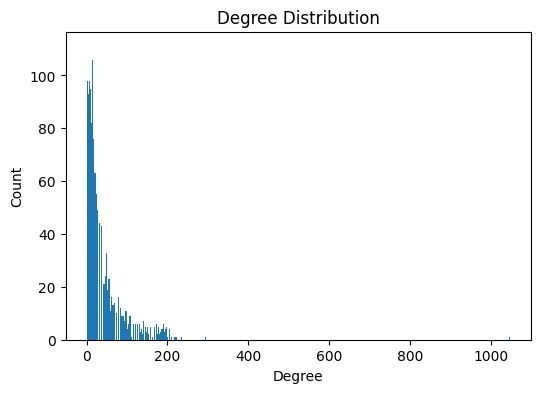

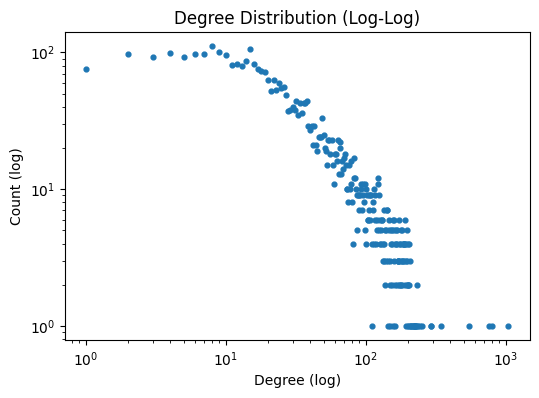


Average clustering coefficient: 0.605547
Graph is connected.
Average shortest path length (largest component): 3.692507

Degree assortativity coefficient: 0.063577
Number of connected components: 1


In [20]:
net = facebook_network

num_nodes = net.number_of_nodes()
num_edges = net.number_of_edges()
deg_list = np.array([d for _, d in net.degree()])

print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)
print("Average degree:", round(deg_list.mean(), 3))
print("Min degree:", int(deg_list.min()))
print("Max degree:", int(deg_list.max()))

unique_deg, counts = np.unique(deg_list, return_counts=True)
deg_dist = dict(zip(unique_deg.tolist(), counts.tolist()))

print("\nDegree distribution (degree: count):")
for k in sorted(deg_dist.keys(), key=int):
    print(f"{int(k)}: {deg_dist[k]}")

plt.figure(figsize=(6,4))
plt.bar(unique_deg, counts)
plt.xlabel("Degree")
plt.ylabel("Count")
plt.title("Degree Distribution")
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(unique_deg, counts, s=12)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Degree (log)")
plt.ylabel("Count (log)")
plt.title("Degree Distribution (Log-Log)")
plt.show()

avg_clust = nx.average_clustering(net)
print("\nAverage clustering coefficient:", round(avg_clust, 6))

if nx.is_connected(net):
    giant = net
    print("Graph is connected.")
else:
    giant_nodes = max(nx.connected_components(net), key=len)
    giant = net.subgraph(giant_nodes).copy()
    print("Graph is not connected; metrics below use the largest component.")

avg_path = nx.average_shortest_path_length(giant)
print("Average shortest path length (largest component):", round(avg_path, 6))

assort = nx.degree_assortativity_coefficient(net)
print("\nDegree assortativity coefficient:", round(assort, 6))

num_components = nx.number_connected_components(net)
print("Number of connected components:", num_components)














### توضیح و انتظار برای هر شاخص محاسبه‌شده در شبکه فیسبوک

**۱. توزیع درجه**  
این شاخص نشان می‌دهد چند گره دارای چند ارتباط هستند. انتظار می‌رفت که در شبکه اجتماعی فیسبوک، بیشتر کاربران ارتباطات محدودی داشته باشند و تنها تعداد کمی از کاربران بسیار پرارتباط باشند.  
نتایج به‌دست‌آمده دقیقاً همین رفتار را نشان می‌دهد: بیشتر گره‌ها درجه‌های پایین دارند و تعداد کمی گره با درجه بسیار بالا وجود دارد. این الگو شبیه به قانون توان است و نشان‌دهنده ساختار مقیاس‌پذیر در شبکه است.

**۲. ضریب خوشه‌بندی میانگین**  
این شاخص میانگین احتمال آن است که دو دوستِ یک فرد، با یکدیگر نیز دوست باشند. انتظار می‌رفت مقدار نسبتاً بالایی داشته باشد، چون در شبکه‌های اجتماعی واقعی، دوستان معمولاً گروه‌های محلی تشکیل می‌دهند.  
مقدار به‌دست‌آمده حدود ۰.۶ است که عدد بالایی محسوب می‌شود و تأیید می‌کند شبکه فیسبوک دارای اجتماع‌های محلی و خوشه‌های منسجم است.

**۳. طول مسیر میانگین**  
این معیار میانگین کوتاه‌ترین فاصله بین تمام جفت گره‌ها را نشان می‌دهد. انتظار می‌رفت مقدار کمی باشد، چون در شبکه‌های اجتماعی معمولاً افراد با چند واسطه به هم متصل‌اند.  
نتیجه حدود ۳.۷ به‌دست‌آمده که نشان می‌دهد شبکه فیسبوک ویژگی دنیای کوچک دارد؛ یعنی هر دو کاربر معمولاً با کمتر از چهار واسطه به هم می‌رسند.

**۴. همبستگی درجه**  
این شاخص نشان می‌دهد آیا گره‌های با درجه بالا تمایل دارند با گره‌های مشابه خود در ارتباط باشند یا نه. انتظار می‌رفت همبستگی مثبت ضعیفی وجود داشته باشد، چون کاربران پرارتباط معمولاً با افراد فعال‌تری نیز در ارتباط‌اند.  
مقدار حدود ۰.۰۶ به‌دست‌آمده که اندکی مثبت است و این فرض را تأیید می‌کند.

**۵. تعداد مؤلفه‌های همبند**  
این شاخص تعداد زیرشبکه‌های جدا از هم را نشان می‌دهد. انتظار می‌رفت فقط یک مؤلفه اصلی وجود داشته باشد، چون شبکه فیسبوک معمولاً پیوسته است.  
نتیجه دقیقاً یک مؤلفه همبند را نشان می‌دهد، یعنی همه کاربران (مستقیم یا غیرمستقیم) به هم متصل‌اند.


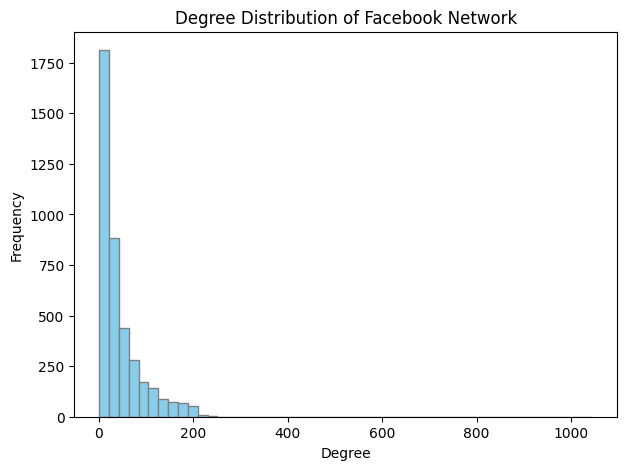

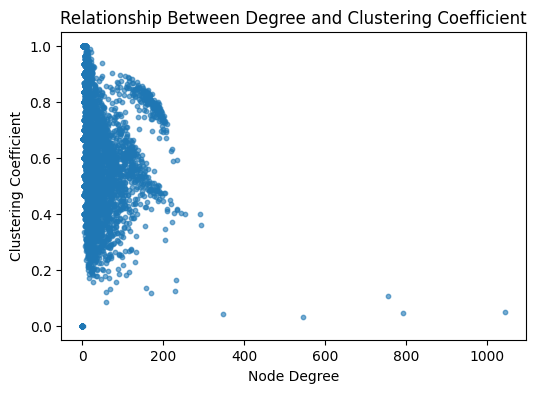

In [21]:

deg_list = np.array([d for _, d in net.degree()])
clust = list(nx.clustering(net).values())

plt.figure(figsize=(7,5))
plt.hist(deg_list, bins=50, color='skyblue', edgecolor='gray')
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution of Facebook Network")
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(deg_list, clust, s=10, alpha=0.6)
plt.xlabel("Node Degree")
plt.ylabel("Clustering Coefficient")
plt.title("Relationship Between Degree and Clustering Coefficient")
plt.show()

### تحلیل نتایج شبکه فیسبوک

**۱. توزیع درجه**  
در نمودار توزیع درجه، بخش عمده‌ای از گره‌ها دارای درجه‌های پایین هستند و تنها چند گره با درجه‌های بسیار بالا دیده می‌شوند. این رفتار مطابق انتظار است و نشان می‌دهد که شبکه فیسبوک ساختار **مقیاس‌پذیر** دارد.  
یعنی اکثر کاربران ارتباطات محدودی دارند، اما تعداد کمی از کاربران بسیار فعال (هاب‌ها) با تعداد زیادی از افراد در ارتباط‌اند. این ویژگی معمولاً در شبکه‌های واقعی مانند شبکه‌های اجتماعی، نقل‌و‌انتقالات یا اینترنت دیده می‌شود.  

**۲. رابطه بین درجه و ضریب خوشه‌بندی**  
در نمودار دوم مشاهده می‌شود که هرچه درجه افزایش می‌یابد، ضریب خوشه‌بندی تمایل به کاهش دارد. این یعنی کاربران پرارتباط معمولاً در خوشه‌های محلی منسجم قرار ندارند و بیشتر نقش پل بین گروه‌ها را دارند.  
این الگو هم مطابق انتظار است، زیرا در شبکه‌های اجتماعی معمولاً افراد با دوستان زیاد، در گروه‌های مختلفی عضو هستند و ارتباط‌های پراکنده‌تری دارند.  

**۳. شاخص‌های کلی شبکه**  
**میانگین خوشه‌بندی ۰٫۶** عدد نسبتاً بالایی است و نشان می‌دهد گروه‌های دوستی فشرده در شبکه وجود دارد.  
 **میانگین طول مسیر حدود ۳٫۷** است، که نشان‌دهنده ویژگی **دنیای کوچک** است؛ هر دو کاربر معمولاً با کمتر از چهار واسطه به هم می‌رسند.  
 **همبستگی درجه مثبت (۰٫۰۶)** است، یعنی کاربران پرارتباط بیشتر با کاربران مشابه خود در ارتباط‌اند، هرچند این ارتباط ضعیف است.  
 **تعداد مؤلفه‌های همبند برابر با ۱** است، یعنی کل شبکه پیوسته بوده و همه کاربران به‌طور غیرمستقیم به هم متصل‌اند.

**۴. موارد غیرمنتظره**  
مقدار زیاد برخی درجات (تا بیش از ۱۰۰۰) کمی غیرمنتظره است، چون در فیسبوک واقعی معمولاً محدودیت‌های نرم‌افزاری برای تعداد ارتباط وجود دارد. با این حال، این رفتار در داده‌های پژوهشی معمول است و احتمالاً ناشی از کاربران «مرکزی» یا گره‌های فوق‌العاده فعال در مجموعه داده است.  

به طور کلی، نتایج به‌خوبی با انتظارات شبکه‌های اجتماعی واقعی مطابقت دارد و ساختار **مقیاس‌پذیر و دنیای کوچک** شبکه فیسبوک را تأیید می‌کند.
